[View in Colaboratory](https://colab.research.google.com/github/sthalles/tensorflow-tutorials/blob/master/day_2_1/Day_2_CIFAR10_Eager_ConvNet_Solution.ipynb)

# Exploring the New Eager Execution TensorFlow API

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
plt.rcParams["axes.grid"] = False

Using TensorFlow backend.


# Deep Learning

Deep Learning is a branch of machine learning focused on building algorithms that learn data representations (instead of task-specific solutions) 

Deep Learning is **state-of-the-art** in almost all **perception** problem: 

- Natural Language Processing (NLP)
- Voice Recognition
- Computer Vision

![alt text](https://developer.nvidia.com/sites/default/files/Deep_Learning_Icons_R5_PNG.jpg.png)

Deep Learning is a **family of methods**:
- Feedforward Network
- Convolutional Nets
- Recurrent Nets
- Auto-Encoders
- Generative Adversarial Networks
- etc...

# TensorFlow Eager Execution

Eager execution is a new **high-level TF API** that lets users execute tensors in real time (**Imperative**) fashion. 

- Brings TF to the level of some other Deep Learning frameworks like PyTorch and Chainer.
- Run TF models just like any other python code (Numpy and python objects compliant)
- Don't think about Computational Graphs - Just execute code normally 
- Allows for **real-time python** Debugging
- To enable Eager Execution - just run: **tf.enable_eager_execution()**

## Exercise

1- Enable eager execution mode using *tf.enable_eager_execution()*.

In [2]:
# Enable eager execution mode
tfe = tf.contrib.eager

## YOUR CODE GOES HERE
tf.enable_eager_execution()

In [3]:
# Build a constant using tf.constant() and try to print it
a = tf.constant([[1, 2],
                 [3, 4]])
print(a)
# => tf.Tensor([[1 2]
#               [3 4]], shape=(2, 2), dtype=int32)

# Broadcasting support
b = tf.add(a, 1)
print(b)
# => tf.Tensor([[2 3]
#               [4 5]], shape=(2, 2), dtype=int32)

# Operator overloading is supported
print(a * b)
# => tf.Tensor([[ 2  6]
#               [12 20]], shape=(2, 2), dtype=int32)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [4]:
# Use NumPy values
print("\n\nUse NumPy values")
import numpy as np

c = np.multiply(a, b)
print(c)
# => [[ 2  6]
#     [12 20]]

# Obtain numpy value from a tensor:
print(a.numpy())
# => [[1 2]
#     [3 4]]
print(np.multiply(a,b))



Use NumPy values
[[ 2  6]
 [12 20]]
[[1 2]
 [3 4]]
[[ 2  6]
 [12 20]]


In [5]:
if tf.executing_eagerly():
    print("Eager is Enabled!")

Eager is Enabled!


# Computer Vision 101 with CIFAR-10 

## Exploring the CIFAR-10 dataset

Computer Vision is a branch of AI devoted to **building algorithms that enable machines to perceive the world**. 

It contains **greyscale images of handwritten digits** like these.

The CIFA-10 dataset is composed of **50000 thousand images** for training and **10000** for testing.

In [6]:
from keras.datasets import cifar10
# x_train, x_test: uint8 array of RGB image data with shape (num_samples, 3, 32, 32).
# y_train, y_test: uint8 array of category labels (integers in range 0-9) with shape (num_samples,).
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [7]:
print("Train data shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Min value: %f, Max value: %f:" % (np.min(X_train[0]), np.max(X_train[0])))
print("Mean %f, STD %f" % (np.mean(X_train), np.std(X_train)))
print("------------")
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train data shape: (50000, 32, 32, 3)
Train labels shape: (50000,)
Min value: 0.000000, Max value: 255.000000:
Mean 120.707565, STD 64.150076
------------
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


In [8]:
cifar_10 = ["airplane",									
            "automobile",										
            "bird",									
            "cat",								
            "deer",									
            "dog",								
            "frog",									
            "horse",									
            "ship",									
            "truck"]

n_classes = len(cifar_10)
print("Number of classes:", n_classes)

Number of classes: 10


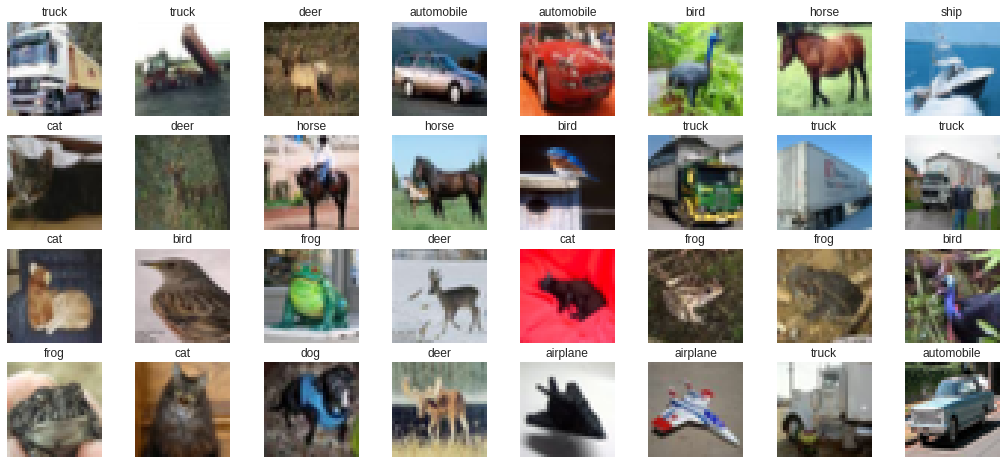

In [9]:
fig = plt.figure(figsize=(18,8))
n_columns = 8
n_rows = 4

for i in range(1,n_columns*n_rows+1):
  fig.add_subplot(n_rows, n_columns, i)
  plt.imshow(X_train[i])
  plt.title(cifar_10[y_train[i]])
  # Turn off tick labels
  plt.xticks([])
  plt.yticks([])
plt.show()

## Numerical Stabilization

Any time we are up to doing some calculus on a computer, we need to think about representation.
- We all know, machines are **memory-limited**

## Exercise

Accessing numerical error.
1. Create two variables a and b.
2. Assign 1000000000 (one billion) to a and 0.000001 to be
3. In the loop add b to a 1000000 (one million) times

What happens? What should the result be?

In [10]:
a = 1000000000 # one billion
b = 0.000001
for i in range(1000000):
  a += b

print("a:", a)
print("a - 1000000000:", a - 1000000000)
print("Error:", 1 - (a - 1000000000))

a: 1000000000.9536743
a - 1000000000: 0.95367431640625
Error: 0.04632568359375


Try now to substitute the 1000000000 (one billion) to just one.

What do you see? 

When calculating the grandients and the loss, we do NOT want their values to get too **BIG** or too **SMALL**.
- **Facilitates the job of the optimizer** (find the best spot in the error function)
- Makes convergence FASTER and reduces the probability of **DIVERGENCE**.

**That is why normalization is important.**

## Exercise

Like we did before, divide the training data into **train** and **validation** sets.

- You may use: [train_test_split()](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Choose a reasonable value for the split fraction.

In [11]:
## YOUR CODE GOES HERE
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Visualize the dataset Shapes

In [12]:
print("Train shape:", X_train.shape)
print("Train labels:", y_train.shape)
print("Validation shape:", X_val.shape)
print("Validation labels:", y_val.shape)
print("Test shape:", X_test.shape)
print("Test labels:", y_test.shape)

Train shape: (45000, 32, 32, 3)
Train labels: (45000,)
Validation shape: (5000, 32, 32, 3)
Validation labels: (5000,)
Test shape: (10000, 32, 32, 3)
Test labels: (10000,)


## Exercise

Build the **normalizer()** function above. 

Our goal is to keep the input values (pixels) in a small range.

1. Option 1: Dvide the image pixels by 255. What does it mean?
2. Option 2: Subtract each pixel by 128 and divide by 128. 

In [13]:
def normalizer(image, label):
  """
  TODO: Finish the normalizer function
  """
  return 2 * tf.to_float(image) / 255. - 1.0, label

Train: [4524. 4513. 4473. 4477. 4514. 4496. 4515. 4491. 4497. 4500.]
Test: [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Validation: [476. 487. 527. 523. 486. 504. 485. 509. 503. 500.]


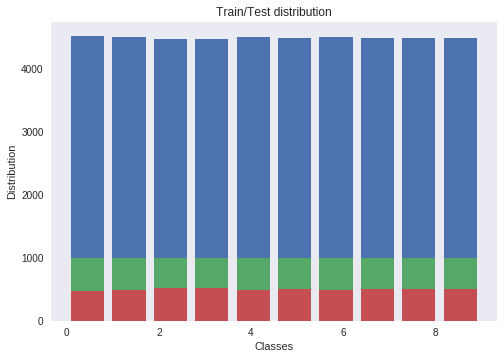

In [14]:
## Visualize the dataset distribution
import pylab as P
n, bins, patches = P.hist(y_train, bins=10, histtype="bar", rwidth=0.8)
print("Train:", n)
n, bins, patches = P.hist(y_test, bins=10, histtype="bar", rwidth=0.8 )
print("Test:", n)
n, bins, patches = P.hist(y_val, bins=10, histtype="bar", rwidth=0.8 )
print("Validation:", n)
P.xlabel('Classes')
P.ylabel('Distribution')
P.title('Train/Test distribution')
P.show()

In [15]:
print("Max value:", np.max(X_train[0]))
print("Min value:", np.min(X_train[0]))
print("Mean:", np.mean(X_train[0]))
print("Std:", np.std(X_train[0]))

Max value: 244
Min value: 8
Mean: 86.16569010416667
Std: 56.69293967301879


## Building our Convulutional Neural Net


![alt text](http://cs231n.github.io/assets/cnn/convnet.jpeg)

The basic architecture follows a simple sequence of operations.
1. Convolution
2. Activation function
3. Pooling
4. Fully-Connected layers 

In the end, to build the classification layer, we usually use a fully-connected layer.

Refer to these links for full documentations:

- [Keras Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [Keras Activation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation)
- [Keras MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
- [Keras Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

## Fully-Connected layers

Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in regular Neural Networks.

![alt text](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)

## Convolutions and Non-linearity

The convolution is a linear operation that uses **small local receptive fields** that pass over an image to create feature maps between the input and the next layer. 

Its main advantage is that we do not need to **hand-engineer** the features (filter).
- The network will learn them for us.

Also, Convolutions are very memory efficient.
- They **share parameters** across space.

![Convolution](http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif)

Non-linearity is what makes DNN cool.

ReLU (rectified linear Unit) is one of the most simple functions one can think of.
- Yet, they do just what we need. **Non-linearity** and **Differentiability**.

![NonLinearity](https://tiny.colaflycdn.com/static/img/learn/relu.png)

## Pooling

- The pooling layer serves to **progressively reduce the spatial size of the representation**

- Divides the Image into N partitions, and for each partition get the maximum value.

- Reduces the **Number of parameters and amount of computation** 
- Acts as a zoom operation. 

![alt text](http://cs231n.github.io/assets/cnn/maxpool.jpeg)
![alt text](http://cs231n.github.io/assets/cnn/pool.jpeg)

## Exercise:

Build your own DNN using eager execution.

Hint: Use the [Keras layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) built into Tensorflow.

Convolutional Net template:






In [16]:
# def ConvNet():
#   Conv()
#   Pooling()
#   Conv()
#   Pooling()
#   ...
#   Flatten()
#   Dense()
#   Dense()
#   ...
#   Classification layer - Dense()

*tf.keras.layers.Conv2D(filters, kernel_size, strides, padding, activation=tf.nn.relu, use_bias)*
- filters: Number of convolutional filters. Can be 16, 32, 48 .
- kernel_size: The size of the filter. Usually 3, or 5.
- strides: Number of pixels that the filter should skip. Usually 1 or 2 (if 2, the output will have a smaller size).
- padding: One of 'same' or 'valid'. Valid padding means no padding.


*tf.keras.layers.MaxPool2D(pool_size, strides=2, padding='same')*
- Used to reduce the features spatial dimensions.

- pool_size: Size of the pooling window. Usually, 2
- strides: Go with 2.
- padding: Go with 'same'. We want to reduce the feature vectors dimensions!

*tf.keras.layers.Dense(units=128, activation=tf.nn.relu)*

- units: Number of neuron units: 96, 128, 256, 512 ...

Build a last Dense layer and set the *units* to have the **number of classes** of the dataset and **no Activation Function**.

![NonLinearity](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)

In [17]:
class CIFARModel(tf.keras.Model):
    
    def __init__(self):
        super(CIFARModel, self).__init__() # Call the super class constructor
        
        # Now define the layers of your model
        # The convolutions, ReLUs and classifications layers goes here
        # CODE GOES HERE
        self.conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1),
                                            padding='same', activation=tf.nn.relu, use_bias=True)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="same")
        self.flatten = tf.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)
        self.logits = tf.keras.layers.Dense(units=10)

    def call(self, inputs):
        # Use the layers defined in the constructor
        # Here, we define the model hierarchical computations
        # Start by passing the inputs to the first Conv layer and chain the results to the next layers
        # CODE GOES GERE
        conv1 = self.conv1(inputs)
        pool1 = self.pool1(conv1)
        flat = self.flatten(pool1)
        fc1 = self.fc1(flat)
        logits = self.logits(fc1)
        return logits

# Loss

The loss function (or objective) is responsible for measuring how **good/bad** our classifier is doing. 

There are many loss functions.

For **multiclass problems**, we usually use the **cross-entropy** function.

The cross-entropy loss (log-loss) is used to measure the performance of a classifier that outputs probabilities.

![alt text](https://github.com/sthalles/tensorflow-tutorials/blob/master/images/cross_entropy.png?raw=true)

- The cross-entropy **increases** when the predicted value deviates from the true values and **decreases** otherwise.

One-hot encoding is a form of representing categorical data so that each category (class) contains the same power (magnitude) over one another.

![One-hot encodding representation](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRo9fhLj8UpmziNvD_eifQ3SkjybaaGmlfLd5Z2fsDn3XaASUoWw)

### Exercise:

Finish the **loss()** function bellow.

1. Remember, our labels are vectors. *Example: [0, 3, 2, 5, 6, ..., 5]*. 

2. Each number represents the image corresponding class. However, in order to make the labels equally valued, we need to convert them to binary representations (**one-hot-encoding**).

3. Use the [tf.one_hot()](https://www.tensorflow.org/api_docs/python/tf/one_hot) function to convert the labels to the proper format.

4. For the cross-entropy loss you can choose to **write it your self** or use the built-in [tf.nn.softmax_cross_entropy_with_logits_v2()](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2). 

  - If you take the challenge of writing it, [tf.multiply()](https://www.tensorflow.org/api_docs/python/tf/multiply) and [tf.log()](https://www.tensorflow.org/api_docs/python/tf/log) will help. 

In [18]:
def loss(logits, labels):
  # YOUR CODE GOES HERE
  labels_one_hot = tf.one_hot(labels, 10)
  
  # cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels_one_hot, logits=logits)
  # print(cross_entropy.shape)

  cross_entropy = tf.multiply(labels_one_hot, tf.log(tf.nn.softmax(logits))) # element wise multiplication
  return - tf.reduce_mean(cross_entropy)

## Exercise - Hyperparameters


Tune the hyperparameters bellow.
- Remember: The learning rate controls how fast your model learns. 
- A bigger learning rate might get you to a sub-optimal objective faster, but you might **overshoot the target.**

In [19]:
## CODE GOES HERE
epochs = 1
batch_size = 16
learning_rate = 0.001

# Optimizers

The Optimizer is the algorithm responsible for applying the gradients to the Model's weight variables. 

Imagine a curved surface (just an example), the goal is to find the minimal value of that surface. 

The Gradient points to the direction of **steepest ascent**. Thus, we follow the opposite direction of the gradient (**steepest descent**).

These are some of the Optimizers available in Tensorflow

- **AdadeltaOptimizer**: Optimizer that implements the Adadelta algorithm.

- **AdagradOptimizer**: Optimizer that implements the Adagrad algorithm.

- **AdamOptimizer**: Optimizer that implements the Adam algorithm.

- **GradientDescentOptimizer**: Optimizer that implements the gradient descent algorithm.

- **MomentumOptimizer**: Optimizer that implements the Momentum algorithm.

[Tensorflow Build-in Optimizers](https://www.tensorflow.org/versions/r1.2/api_docs/python/tf/train)

## Exercise:

1. Pick one of these optimizers and  use it to minimize the loss function for your model.


![alt text](https://cs231n.github.io/assets/nn3/opt1.gif)

In [20]:
# Choose one of the optimizers and set an initial learning rate
# CODE GOES HERE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [21]:
# Create the model
model = CIFARModel()

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(normalizer)
train_dataset = train_dataset.shuffle(1000) # shuffle before each epoch and bufferize some data
train_dataset = train_dataset.repeat(epochs) # number of epochs
train_dataset = train_dataset.batch(batch_size) # batch size

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.map(normalizer)
val_dataset = val_dataset.repeat(1) # number of epochs
val_dataset = val_dataset.batch(128) # batch size

## Exercise

Finish the training loop. The main part is the **Gradient Tape**. It accumulates gradients for a batch.

Inside the **GradientTape()** scope:
1. Compute the logits, run a forward pass through the model.
2. Use the logits to compute the loss value i.e. call the **loss()** function.
3. Outside of the **GradientTape()** scope compute the **gradient of the loss with respect to the weights**.

In [1]:
train_epoch_loss_avg = tfe.metrics.Mean()
train_epoch_accuracy = tfe.metrics.Accuracy()

for (step, (batch_images, batch_labels)) in enumerate(tfe.Iterator(train_dataset)):

  
  with tfe.GradientTape() as tape:
    # Call the model() here and pass it the input batches
    logits = model(batch_images)

    # Call the loss() function - That will give you the loss signal for the given batch
    loss_value = loss(logits, batch_labels)
   
  # Compute the gradient of the loss with respect to the models' weights
  grads = tape.gradient(loss_value, model.variables)
  
  optimizer.apply_gradients(zip(grads, model.variables),
                            global_step=tf.train.get_or_create_global_step())
  
  train_epoch_loss_avg(loss_value)
  train_epoch_accuracy(tf.cast(tf.argmax(logits, axis=1), tf.uint8), batch_labels)
  
  if step % 100 == 0:
    val_predictions = []
    for (val_step, (val_images, val_labels)) in enumerate(tfe.Iterator(val_dataset)):
      val_logits = model(val_images)
      val_pred = tf.argmax(val_logits, axis=1)
      val_predictions.extend(val_pred)
      
    print("Training loss: {: .3}\tTrain Accuracy: {: .3}\tValidation Accuracy: {: .3}".format(train_epoch_loss_avg.result(), train_epoch_accuracy.result(), accuracy_score(val_predictions, y_val)))

NameError: ignored

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def normalized_acc(conf_matrix):
    for i in range(conf_matrix.shape[0]):
        print("Acc class {0} --> {1: .3}".format(i, conf_matrix[i,i]/sum(conf_matrix[i])))

## Evaluation

Run the trained model using the testing dataset.

In [0]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.map(normalizer)
test_dataset = test_dataset.repeat(1) # number of epochs
test_dataset = test_dataset.batch(128) # batch size

test_predictions = []
for (_, (test_images, test_labels)) in enumerate(tfe.Iterator(test_dataset)):
  test_logits = model(test_images)
  test_pred = tf.argmax(test_logits, axis=1)
  test_predictions.extend(test_pred)

print("Test Overall Accuracy: {: .3}".format(accuracy_score(test_predictions, y_test)))

Test Overall Accuracy:  0.556


Confusion matrix, without normalization


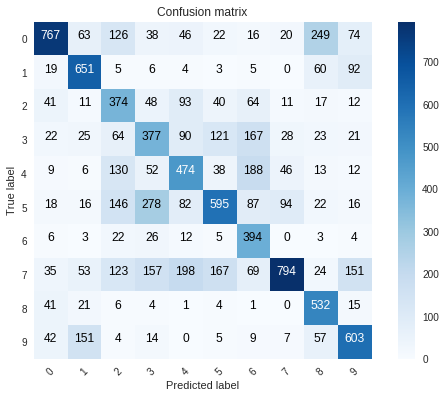

In [0]:
conf_matrix = confusion_matrix(test_predictions, y_test)
_ = plot_confusion_matrix(conf_matrix, classes=[str(i) for i in range(10)])

In [0]:
normalized_acc(conf_matrix)

Acc class 0 -->  0.54
Acc class 1 -->  0.77
Acc class 2 -->  0.526
Acc class 3 -->  0.402
Acc class 4 -->  0.49
Acc class 5 -->  0.439
Acc class 6 -->  0.829
Acc class 7 -->  0.448
Acc class 8 -->  0.851
Acc class 9 -->  0.676
